/aiffel/aiffel/human_segmentation/images/sea.png
(1440, 1080, 3)


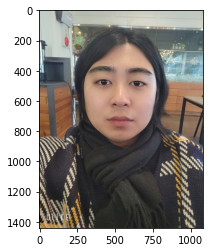

In [54]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
from PIL import Image

# urllib는 웹에서 데이터를 다운로드할 때 사용합니다.
# cv2는 OpenCV 라이브러리로 이미지를 처리하기 위해 필요합니다.
# pixellib는 시맨틱 세그멘테이션을 편하게 사용할 수 있는 라이브러리


img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'  
img_orig = cv2.imread(img_path)
bg_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/sea.png'  
bg_orig = cv2.imread(bg_path)
print(bg_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

# 배경 이미지 사이즈 맞추기

(168, 300, 3)


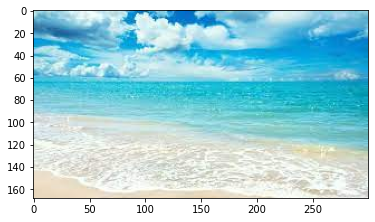

In [48]:
print(bg_orig.shape)
plt.imshow(cv2.cvtColor(bg_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [65]:
img = Image.open('/aiffel/aiffel/human_segmentation/images/my_image.png')
img_size=img.size
print(img_size)

background = Image.open('/aiffel/aiffel/human_segmentation/images/sea.png')

background_resize = background.resize((1080, 1440))
print(background_resize.size)
background_resize.save('/aiffel/aiffel/human_segmentation/images/sea2.png')

(1080, 1440)
(1080, 1440)


In [66]:
bg_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/sea2.png'  
bg_orig = cv2.imread(bg_path)

In [86]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f6d92216280>)

In [87]:
# 세그멘테이션 모델 생성
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

# 모델 이미지 입력
segvalues, output = model.segmentAsPascalvoc(img_path)


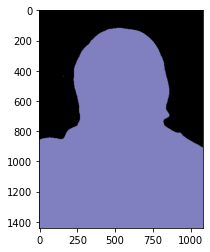

{'class_ids': array([ 0, 15, 20]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])}


In [88]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

plt.imshow(output)
plt.show()
print(segvalues)

In [89]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person
tv


In [90]:

colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]
         
colormap[15]

array([192, 128, 128])

(1440, 1080)


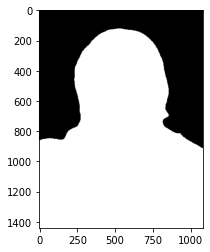

In [91]:
#RGB -> BGR
seg_color = (128,128,192)

# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

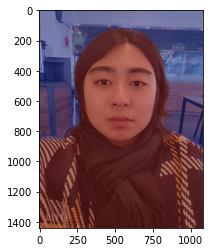

In [92]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

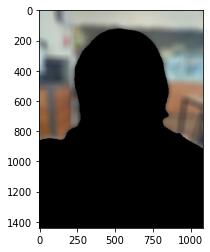

In [93]:
# (13,13)은 blurring kernel size를 뜻합니다

img_orig_blur = cv2.blur(img_orig, (50,50))  

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

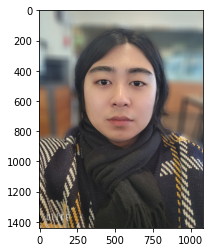

In [97]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

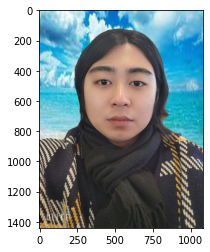

In [98]:
img_concat = np.where(img_mask_color==255, img_orig, bg_orig)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()



# 최소 3장 인물모드 사진 만들어 보기
세가지 예시로 해볼려고 한다.
1. 강아지 
2.배경이 멀리있는 
3.여러명있는 

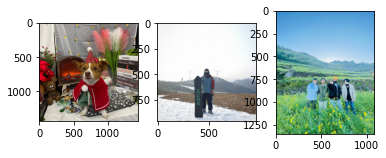

In [99]:
dog_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/dog.png'  
dog_orig = cv2.imread(dog_path)
me_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/snow.png'  
me_orig = cv2.imread(me_path)
us_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/friend.png'  
us_orig = cv2.imread(us_path) 
bg_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/sea.png'  
bg_orig = cv2.imread(bg_path) 
fig = plt.figure()
rows=1
cols=3

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(cv2.cvtColor(dog_orig, cv2.COLOR_BGR2RGB))
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(cv2.cvtColor(me_orig, cv2.COLOR_BGR2RGB))
ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(cv2.cvtColor(us_orig, cv2.COLOR_BGR2RGB))


plt.show()

# 크로마키 사진

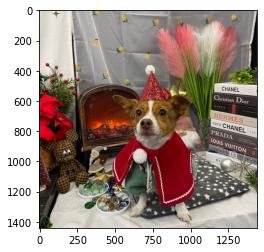

In [44]:
img_show = dog_orig.copy()
img_show


dog = plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

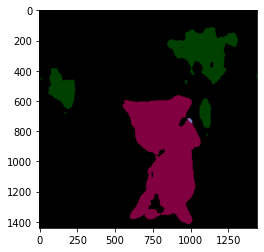

In [12]:
segvalues, output = model.segmentAsPascalvoc(dog_path)
plt.imshow(output)
plt.show()

어허 강아지는 잘안나오네... 다른 라벨값을 써야되나 한번보자

In [13]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
dog
person
pottedplant


왜 펄슨이 나오지???????

In [14]:
LABEL_NAMES.index('dog') # 12

colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3


         
# colormap[15]
# array([192, 128, 128])
colormap[12]

array([ 64,   0, 128])

(1440, 1440)


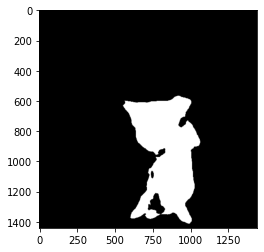

In [15]:
#RGB -> BGR
seg_color = (128,0,64)

# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

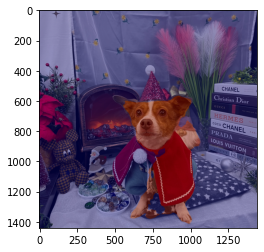

In [16]:
img_show = dog_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

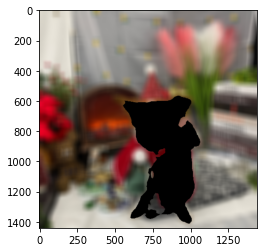

In [22]:
img_orig_blur = cv2.blur(dog_orig, (50,50))  

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

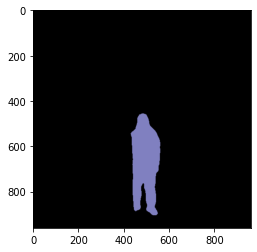

In [19]:
segvalues, output = model.segmentAsPascalvoc(me_path)
plt.imshow(output)
plt.show()

(960, 960)


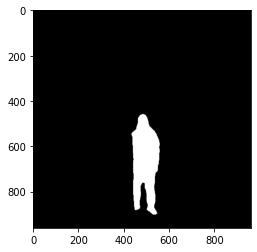

In [23]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[15]

#RGB -> BGR
seg_color = (128,128,192)

# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()



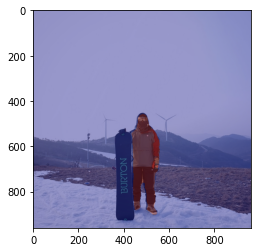

In [24]:
img_show = me_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

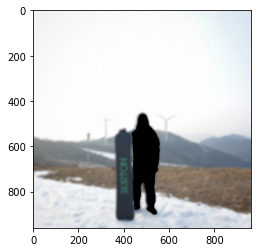

In [25]:


img_orig_blur = cv2.blur(me_orig, (13,13))  

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

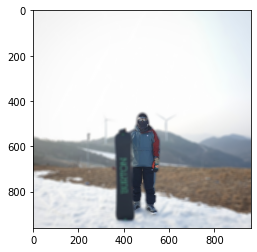

In [26]:
img_concat = np.where(img_mask_color==255, me_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

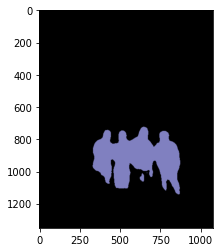

In [27]:
segvalues, output = model.segmentAsPascalvoc(us_path)
plt.imshow(output)
plt.show()

(1350, 1080)


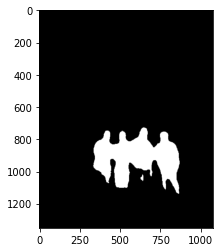

In [28]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[15]

#RGB -> BGR
seg_color = (128,128,192)

# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()



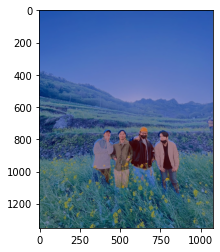

In [29]:
img_show = us_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

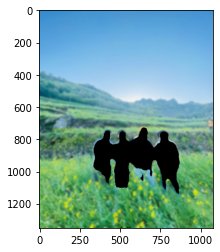

In [30]:


img_orig_blur = cv2.blur(us_orig, (13,13))  

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

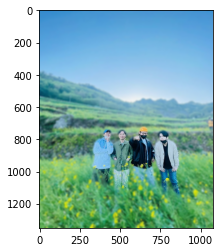

In [31]:
img_concat = np.where(img_mask_color==255, us_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show() 

1. 이러한 기능들이 이런 기술들로 사용되었다는게 참으로 신기하고 내가 이걸 해볼 수 있다는게 재밌었다. 
2. 정확하게 보여줄려면 정말 많은것들을 보고 배우고 해야 될 것 같다.
3. PASCAL VOC 데이터를 따로 추가 해서 다른 형태의 세그먼트를 만들 수 있는지 궁금하다.